In [1]:
# Serkan Ozkan University Of Kocaeli NLP_Project
#Start of the Project

#Libraries
import pandas as pd
import numpy as np 
 

import re  # pip install regex regular expression
import string
import nltk
from nltk.corpus import stopwords           #stopword

from nltk.tokenize import word_tokenize    #tokenization
from nltk.stem import WordNetLemmatizer    #lemmatization
from nltk.stem.porter import PorterStemmer #steamming
from nltk.tokenize import sent_tokenize, word_tokenize #tokenization
from nltk.corpus import wordnet


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Ignoring Warning during trainings 
import warnings
warnings.filterwarnings('ignore')


print('Setup Complete')

Setup Complete


In [2]:
#İmport Dataset
traindata = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
testdata = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
print('Setup Complete')

Setup Complete


In [3]:
# List Of  TrainData

traindata

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
# List Of  TestData

testdata

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [5]:
# Checked for any null values train and test data
traindata.isnull().sum(), testdata.isnull().sum()

(id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64,
 id             0
 keyword       26
 location    1105
 text           0
 dtype: int64)

,target
0,4342
1,3271


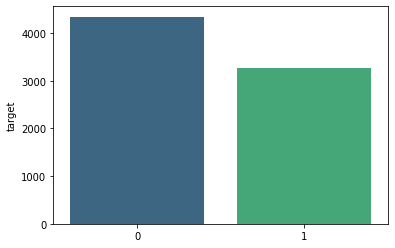

In [6]:
# 0=non disaster tweet, 1=diaster tweet 
VCtrain=traindata['target'].value_counts().to_frame()
sns.barplot(data=VCtrain,x=VCtrain.index,y="target",palette="viridis") #Seaborn code
VCtrain

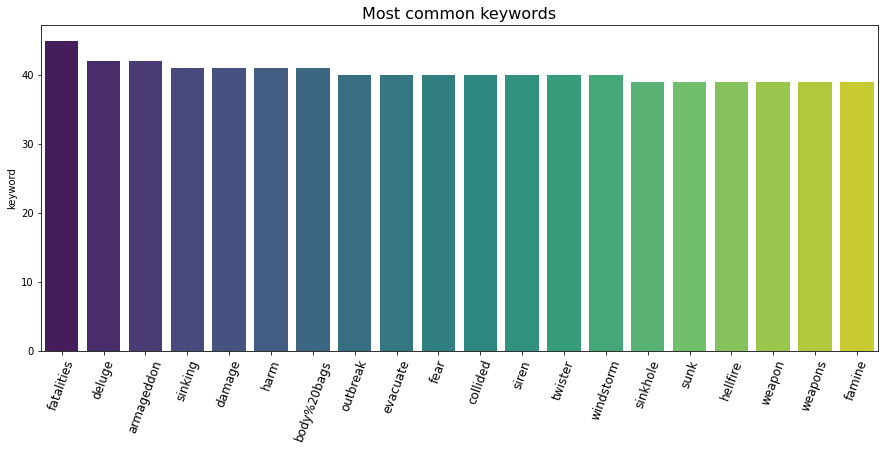

In [7]:
#Most common keywords
common_keywords=traindata["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sns.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Most common keywords",size=16)
plt.xticks(rotation=70,size=12);

In [8]:
#Location of Tweets

traindata.location.value_counts()[:15].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


In [9]:
#Lower method
traindata.text=traindata.text.apply(lambda x:x.lower() )
testdata.text=testdata.text.apply(lambda x:x.lower() )
traindata.text.head(10)

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    just got sent this photo from ruby #alaska as ...
5    #rockyfire update => california hwy. 20 closed...
6    #flood #disaster heavy rain causes flash flood...
7    i'm on top of the hill and i can see a fire in...
8    there's an emergency evacuation happening now ...
9    i'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [10]:
#Removing punctuation 

string.punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

traindata['text']= traindata['text'].apply(lambda x:remove_punctuation(x))
testdata['text']= testdata['text'].apply(lambda x:remove_punctuation(x))
traindata.text.head(5)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [11]:
#remove words containing numbers

traindata.text=traindata.text.apply(lambda x:re.sub('\w*\d\w*' , '', x) )
testdata.text=testdata.text.apply(lambda x:re.sub('\w*\d\w*', '', x) )
traindata.text.head(5)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [12]:
#removing hyperlink
traindata.text=traindata.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )
testdata.text=testdata.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )
traindata.text.head(15)

0     our deeds are the reason of this earthquake ma...
1                 forest fire near la ronge sask canada
2     all residents asked to shelter in place are be...
3      people receive wildfires evacuation orders in...
4     just got sent this photo from ruby alaska as s...
5     rockyfire update  california hwy  closed in bo...
6     flood disaster heavy rain causes flash floodin...
7     im on top of the hill and i can see a fire in ...
8     theres an emergency evacuation happening now i...
9      im afraid that the tornado is coming to our area
10          three people died from the heat wave so far
11    haha south tampa is getting flooded hah wait a...
12    raining flooding florida tampabay tampa  or  d...
13                flood in bago myanmar we arrived bago
14    damage to school bus on  in multi car crash br...
Name: text, dtype: object

In [13]:
#removing spaces

def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    train_data.text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return train_data.text
    test_data.text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return testdata.text
    
traindata.text.head(15)

0     our deeds are the reason of this earthquake ma...
1                 forest fire near la ronge sask canada
2     all residents asked to shelter in place are be...
3      people receive wildfires evacuation orders in...
4     just got sent this photo from ruby alaska as s...
5     rockyfire update  california hwy  closed in bo...
6     flood disaster heavy rain causes flash floodin...
7     im on top of the hill and i can see a fire in ...
8     theres an emergency evacuation happening now i...
9      im afraid that the tornado is coming to our area
10          three people died from the heat wave so far
11    haha south tampa is getting flooded hah wait a...
12    raining flooding florida tampabay tampa  or  d...
13                flood in bago myanmar we arrived bago
14    damage to school bus on  in multi car crash br...
Name: text, dtype: object

In [14]:
#removing spaces for test_Data
testdata.text.head(15)

0                    just happened a terrible car crash
1     heard about earthquake is different cities sta...
2     there is a forest fire at spot pond geese are ...
3                 apocalypse lighting spokane wildfires
4           typhoon soudelor kills  in china and taiwan
5                         were shakingits an earthquake
6     theyd probably still show more life than arsen...
7                                       hey how are you
8                                       what a nice hat
9                                              fuck off
10                                  no i dont like cold
11                              nooooooooo dont do that
12                                 no dont tell me that
13                                              what if
14                                              awesome
Name: text, dtype: object

In [15]:
#Check data for spaces
print(traindata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [16]:
#removing square brackets
traindata.text=traindata.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
testdata.text=testdata.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
traindata.text=traindata.text.apply(lambda x:re.sub('<.*?>+', '', x) )
testdata.text=testdata.text.apply(lambda x:re.sub('<.*?>+', '', x) )
traindata.text.head(15)

0     our deeds are the reason of this earthquake ma...
1                 forest fire near la ronge sask canada
2     all residents asked to shelter in place are be...
3      people receive wildfires evacuation orders in...
4     just got sent this photo from ruby alaska as s...
5     rockyfire update  california hwy  closed in bo...
6     flood disaster heavy rain causes flash floodin...
7     im on top of the hill and i can see a fire in ...
8     theres an emergency evacuation happening now i...
9      im afraid that the tornado is coming to our area
10          three people died from the heat wave so far
11    haha south tampa is getting flooded hah wait a...
12    raining flooding florida tampabay tampa  or  d...
13                flood in bago myanmar we arrived bago
14    damage to school bus on  in multi car crash br...
Name: text, dtype: object

In [17]:
#Tokenization

token=nltk.tokenize.RegexpTokenizer(r'\w+')

traindata.text=traindata.text.apply(lambda x:token.tokenize(x))
testdata.text=testdata.text.apply(lambda x:token.tokenize(x))

display(traindata.text.head())

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [18]:
#Stopwords
nltk.download('stopwords')
traindata.text=traindata.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
testdata.text=testdata.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
traindata.text.head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [19]:
#Stopwords for test_data
testdata.text.head()

0                     [happened, terrible, car, crash]
1    [heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [apocalypse, lighting, spokane, wildfires]
4            [typhoon, soudelor, kills, china, taiwan]
Name: text, dtype: object

In [20]:
#Stemming
stemmer = nltk.stem.PorterStemmer()
traindata.text=traindata.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
testdata.text=testdata.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
traindata.text.head()

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: text, dtype: object

In [21]:
#Text Vectorization
count_vectorizer = CountVectorizer()
traindata_vectors_count = count_vectorizer.fit_transform(traindata['text'])
testdata_vectors_count = count_vectorizer.transform(testdata["text"])

In [22]:
 #Using Logistic Regression for Training Model
# Fitting a simple Logistic Regression on Counts
CLR = LogisticRegression(C=2)
scores = cross_val_score(CLR, traindata_vectors_count, traindata["target"], cv=6, scoring="f1")
scores

array([0.64216216, 0.53497164, 0.5974026 , 0.49843587, 0.598     ,
       0.71346154])

In [23]:
#Using Simple Naive Bayes
# Fitting a simple Naive Bayes
NB_Vec = MultinomialNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(NB_Vec, traindata_vectors_count, traindata["target"], cv=cv, scoring="f1")
scores

array([0.76525822, 0.75764706, 0.74660272, 0.74801902, 0.7611465 ,
       0.75851148, 0.75255302, 0.75697211, 0.75559105, 0.75590551,
       0.75039746, 0.74389283, 0.77115987, 0.75894988, 0.7614534 ])

In [24]:
#Fitting model and predicting the test data
NB_Vec.fit(traindata_vectors_count, traindata["target"])

MultinomialNB()

In [25]:
#saving model pipeline and model
pipe = Pipeline([('Vectors', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer()),
     ('NB', MultinomialNB())])
pipe.fit(traindata.text.values, traindata["target"].values)

Pipeline(steps=[('Vectors', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('NB', MultinomialNB())])

In [26]:
#SavePipeline
with open('pipeline_model.pkl', 'wb') as model_file:
     pickle.dump(pipe, model_file)

In [27]:
#SaveModel
pred=NB_Vec.predict(testdata_vectors_count)

In [28]:
#Test
predicted = pipe.predict(['it is raining fire'])[0]

if predicted == 1:
    print("The tweet is Disaster Tweet")
else:
    print("The tweet is Non Disaster Tweet")

The tweet is Non Disaster Tweet


In [29]:
#Test
predicted = pipe.predict(['The cold across the center of the country early in'])[0]

if predicted == 1:
    print("The tweet is Disaster Tweet")
else:
    print("The tweet is Non Disaster Tweet")

The tweet is Non Disaster Tweet


In [30]:
#Test
predicted = pipe.predict(['Just happened a terrible car crash'])[0]

if predicted == 1:
    print("The tweet is Disaster Tweet")
else:
    print("The tweet is Non Disaster Tweet")

The tweet is Disaster Tweet


In [31]:
#Test
predicted = pipe.predict(['Typhoon Soudelor kills 28 in China and Taiwan'])[0]

if predicted == 1:
    print("The tweet is Disaster Tweet")
else:
    print("The tweet is Non Disaster Tweet")

The tweet is Disaster Tweet


In [32]:
#Test
predicted = pipe.predict(['Apocalypse lighting. #Spokane #wildfires'])[0]

if predicted == 1:
    print("The tweet is Disaster Tweet")
else:
    print("The tweet is Non Disaster Tweet")

The tweet is Non Disaster Tweet


In [33]:
#Live
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission["target"] = pred
sample_submission.to_csv("submission.csv", index=False)